**Group 13**

Arnav Chauhan- 22020845009

Hrithik Prakash Bokade - 22020845015

Pranav Mehta - 22020845024

In [ ]:
# Downloading the packages
!pip install opencv-python

In [ ]:
# Importing the libraries
import cv2

In [ ]:
# Reading the image
# cv2.imread(path_to_image_with_file_extension, flag)
img = cv2.imread("/content/Retro Gaming Accessories.png", 1)

In [ ]:
# Printing the shape of the image
print(img.shape)

(675, 1200, 3)


In [ ]:
h, w, c = img.shape
print("Dimensions of the image is:nnHeight:", h, "pixelsnWidth:", w, "pixelsnNumber of Channels:", c)

Dimensions of the image is:nnHeight: 675 pixelsnWidth: 1200 pixelsnNumber of Channels: 3


In [ ]:
print(type(img))

<class 'numpy.ndarray'>


In [ ]:
print(img.dtype)

uint8


In [ ]:
print(img)

[[[27  6 18]
  [28  6 18]
  [26  6 18]
  ...
  [24  3 17]
  [24  1 17]
  [21  3 14]]

 [[25  6 21]
  [26  6 19]
  [26  6 18]
  ...
  [24  2 17]
  [24  1 17]
  [22  2 15]]

 [[24  6 19]
  [25  6 19]
  [28  6 18]
  ...
  [27  5 17]
  [25  3 17]
  [23  2 16]]

 ...

 [[29  7 29]
  [32  7 28]
  [30 11 27]
  ...
  [27  5 12]
  [27  5 12]
  [26  5 12]]

 [[32  9 29]
  [32  8 31]
  [31  9 29]
  ...
  [27  4 12]
  [27  4 12]
  [26  4 12]]

 [[31  7 29]
  [31  7 30]
  [31  8 29]
  ...
  [27  4 15]
  [27  4 13]
  [26  4 12]]]


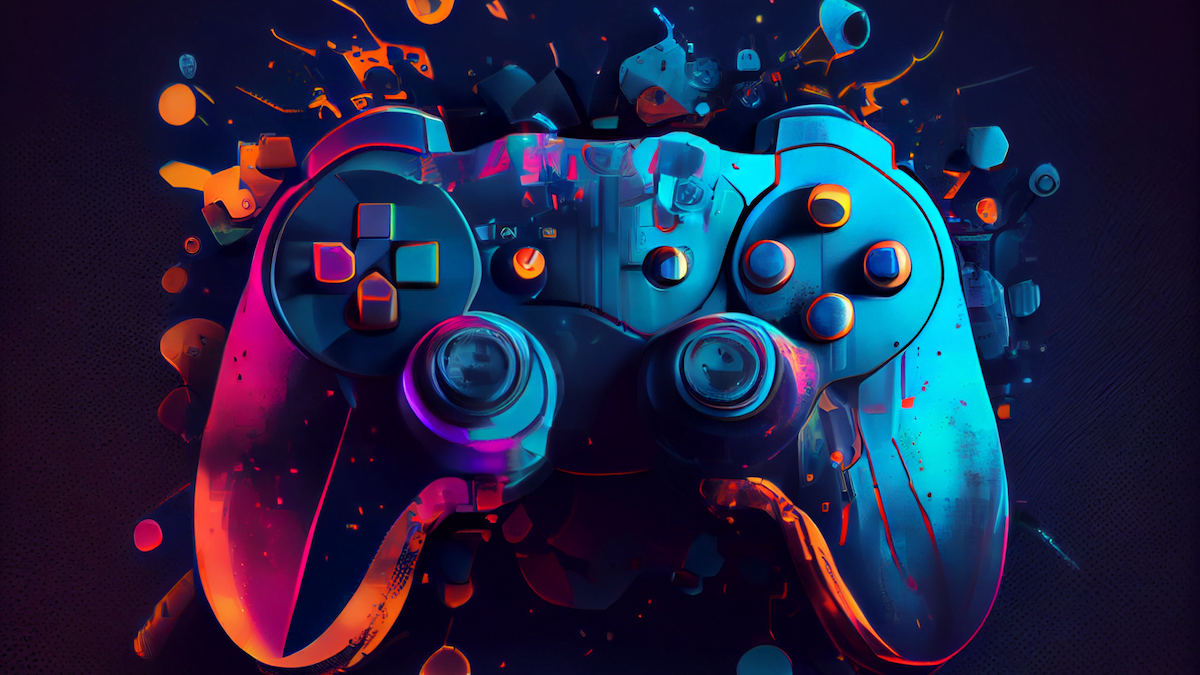

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Assuming img is your image array
cv2_imshow(img)

# Wait for a key press
k = cv2.waitKey(0)

# Check if the key pressed is 'q' or Esc (27)
if k == 27 or k == ord('q'):
    cv2.destroyAllWindows()

In [ ]:
cv2.imshow('Retro Gaming Accessories.png', img)
k = cv2.waitKey(0)
if k == 27 or k == ord('q'):
    cv2.destroyAllWindows()

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
cv2.imwrite('Retro Gaming Accessories.png', gray)


True

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def extract_bit_plane(cd):
    #  extracting all bit one by one
    # from 1st to 8th in variable
    # from c1 to c8 respectively
    c1 = np.mod(cd, 2)
    c2 = np.mod(np.floor(cd/2), 2)
    c3 = np.mod(np.floor(cd/4), 2)
    c4 = np.mod(np.floor(cd/8), 2)
    c5 = np.mod(np.floor(cd/16), 2)
    c6 = np.mod(np.floor(cd/32), 2)
    c7 = np.mod(np.floor(cd/64), 2)
    c8 = np.mod(np.floor(cd/128), 2)
    # combining image again to form equivalent to original grayscale image
    cc = 2 * (2 * (2 * c8 + c7) + c6) # reconstructing image  with 3 most significant bit planes
    to_plot = [cd, c1, c2, c3, c4, c5, c6, c7, c8, cc]
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for ax, i in zip(axes.flat, to_plot):
        ax.imshow(i, cmap='gray')
    plt.tight_layout()
    plt.show()
    return cc

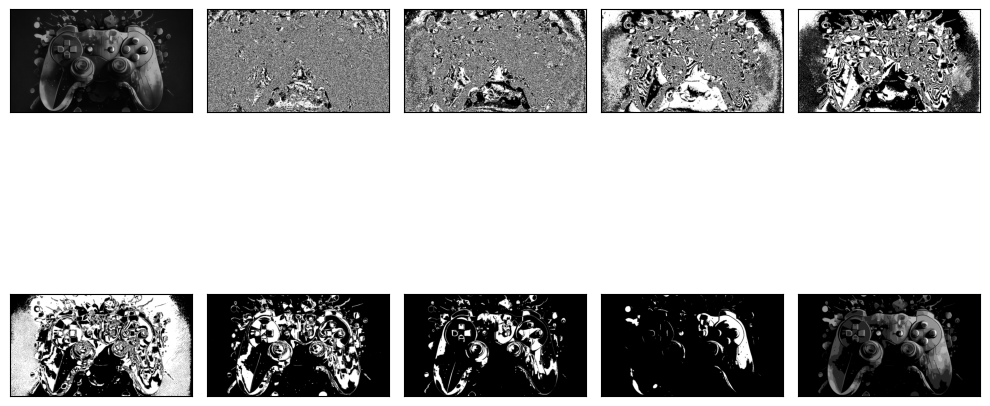

In [ ]:
reconstructed_image = extract_bit_plane(gray)

### Edge Detection and Image Gradients

**Edges** are significant local changes of intensity in a digital image. An edge can be defined as a set of connected pixels that forms a boundary between two disjoint regions. There are three types of edges:

*   Horizontal edges
*   Vertical edges
*   Diagonal edges

**Edge Detection** is a method of segmenting an image into regions of discontinuity. It is a widely used technique in digital image processing like

*   pattern recognition
*   image morphology
*   feature extraction

Edge detection allows users to observe the features of an image for a significant change in the gray level. This texture indicating the end of one region in the image and the beginning of another. It reduces the amount of data in an image and preserves the structural properties of an image.

Edge Detection Operators are of two types:

*   **Gradient –** based operator which computes first-order derivations in a digital image like, Sobel operator, Prewitt operator, Robert operator
*   **Gaussian –** based operator which computes second-order derivations in a digital image like, Canny edge detector, Laplacian of Gaussian

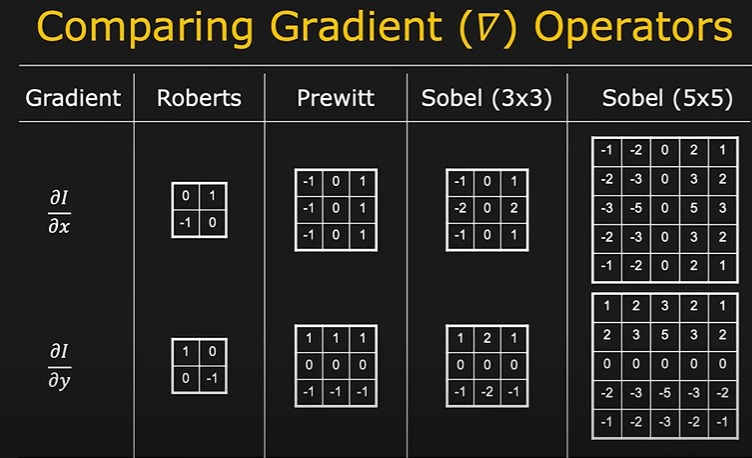

In [ ]:
# Converting Color Space
# The cvtColor function is used to convert the color space of the image from the default BGR (Blue, Green, Red) to RGB (Red, Green, Blue)
# This is done because Matplotlib expects RGB format when displaying images

image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
# Getting Image Dimensions

# Getting the height, width, and number of channels of the image
# The shape attribute of the image provides a tuple representing its dimensions: height, width, and the number of channels
# Here, hgt, wdt, and _ (underscore) are used to unpack these values. The number of channels is not explicitly used in this code

hgt, wdt,_ = image.shape

**The Sobel operator is a convolution-based filter. It is a discrete differentiation operator.** It computes the gradient approximation of image intensity function for image edge detection. At the pixels of an image, the Sobel operator produces either the normal to a vector or the corresponding gradient vector.
It works by convolving the image with a small, separable filter in both the horizontal (X) and vertical (Y) directions. The filter emphasizes changes in intensity that occur along these directions.

It uses two 3 x 3 kernels or masks which are convolved with the input image to calculate the vertical and horizontal derivative approximations respectively –

Sobel X:
[ -1  0  1 ]
[ -2  0  2 ]
[ -1  0  1 ]

Sobel Y:
[ -1 -2 -1 ]
[  0  0  0 ]
[  1  2  1 ]

The convolution operation is applied to the image, resulting in two new images: one representing the gradient in the X direction (horizontal changes in intensity) and another representing the gradient in the Y direction (vertical changes in intensity).

*   **cv2.Sobel:** This is the function in OpenCV used to apply the Sobel operator.
*   **cv2.CV_64F:** Specifies that the output should be in 64-bit floating-point format.
*   **0 and 1:** Indicates the direction of the Sobel operator. In the first line, 0 means the Sobel operator is applied in the X direction (horizontal), and in the second line, 1 means the Sobel operator is applied in the Y direction (vertical).
*   **ksize=5:** Specifies the size of the Sobel kernel. Larger kernel sizes result in smoother gradients but may lose finer details.

In [ ]:
# Apply Sobel operator for edge detection in both X and Y directions

# These lines apply the Sobel operator in both the X and Y directions to compute the gradients of the image
# The CV_64F indicates that the output should be in 64-bit floating-point format
# The ksize parameter specifies the size of the Sobel kernel

x_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
y_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

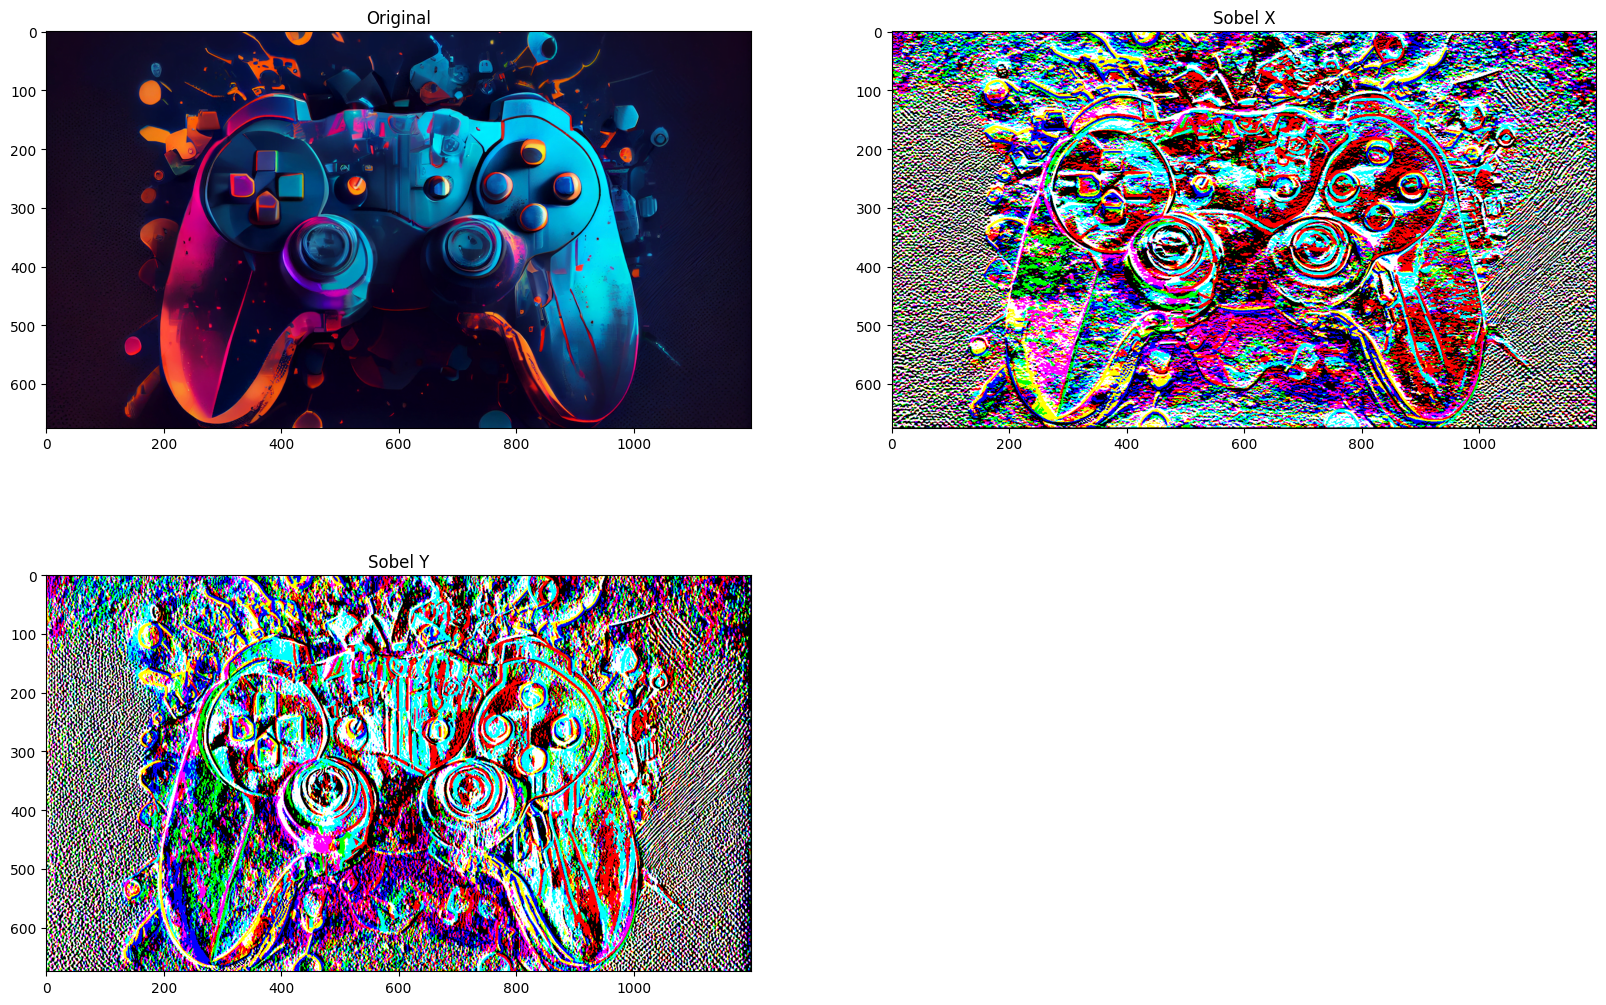

In [ ]:
# Create a subplot with 3 rows, 2 columns, and set the size of the entire figure
# These lines use Matplotlib to create a figure with a 3x2 grid of subplots
# The original image, Sobel X result, and Sobel Y result are then displayed in different subplots with corresponding titles

plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(x_sobel)
plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(y_sobel)

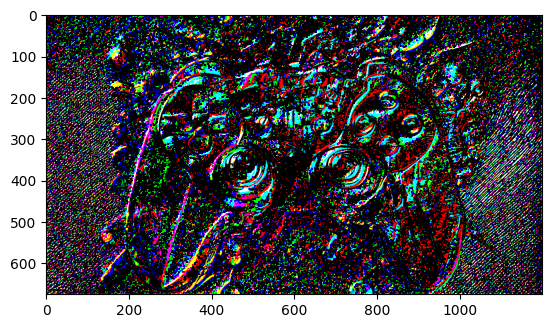

In [41]:
# Combine the results of Sobel X and Sobel Y using bitwise OR
# The bitwise_or function combines the results of Sobel X and Sobel Y using a bitwise OR operation. The result is then displayed in another subplot

sobel_or = cv2.bitwise_or(x_sobel, y_sobel)
plt.imshow(sobel_or)

**Marr-Hildreth Operator or Laplacian of Gaussian (LoG):** It is a gaussian-based operator which uses the Laplacian to take the second derivative of an image. This really works well when the transition of the grey level seems to be abrupt. It works on the zero-crossing method i.e when the second-order derivative crosses zero, then that particular location corresponds to a maximum level. It is called an edge location. Here the Gaussian operator reduces the noise and the Laplacian operator detects the sharp edges.
The Gaussian function is defined by the formula:

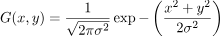


Where
alpha is the standard deviation.
And the LoG operator is computed from


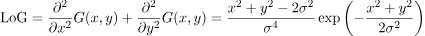

The Laplacian operator is often represented by the following 3x3 kernel:

[ 0  1  0 ]
[ 1 -4  1 ]
[ 0  1  0 ]

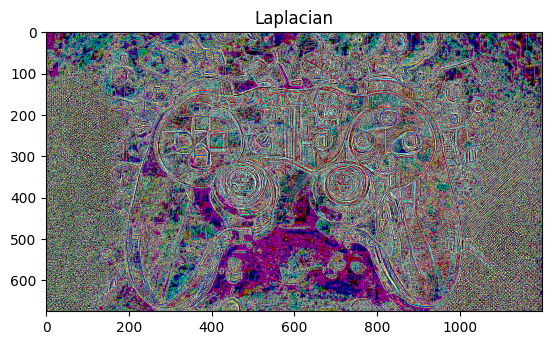

In [40]:
# Apply Laplacian operator for edge detection
# The Laplacian operator is applied to detect edges in the image. The result is displayed in a new subplot.

laplacian = cv2.Laplacian(image, cv2.CV_64F)
plt.title("Laplacian")
plt.imshow(laplacian)

**Advantages:**

*   Easy to detect edges and their various orientations
*   There is fixed characteristics in all directions

**Limitations:**
*   Very sensitive to noise
*   The localization error may be severe at curved edges
*   It generates noisy responses that do not correspond to edges, so-called “false edges”

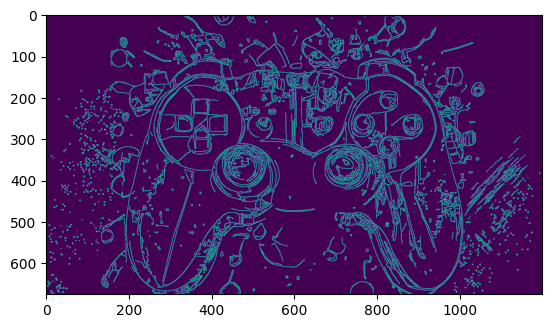

In [42]:
# Apply Canny edge detection with thresholds 50 and 120
canny = cv2.Canny(image, 50, 120)
plt.imshow(canny)


**The Canny edge detection algorithm** is a multi-stage process that involves smoothing the image with a Gaussian filter, finding the intensity gradients, applying non-maximum suppression, and finally, performing edge tracking by hysteresis. The two thresholds mentioned (50 and 120) are critical parameters in the Canny edge detection process.

Here's why these specific thresholds are used:


1.   **Gradient Magnitude:**
In the Canny edge detection algorithm, the image is first convolved with a Gaussian filter to smooth it and reduce noise. Then, the gradient magnitude and direction are calculated using derivatives in the X and Y directions (Sobel operators).

2.   **Non-Maximum Suppression:**
After computing the gradient magnitude, the algorithm performs non-maximum suppression. This involves identifying the local maxima in the gradient magnitude. Pixels that do not represent local maxima are set to zero.

3.   **Double Thresholding:**
The double thresholding step involves categorizing the remaining edge pixels into strong, weak, or non-edge pixels based on two threshold values:

*   Low Threshold (50): Pixels with gradient magnitudes below this value are marked as non-edge pixels.

*   High Threshold (120): Pixels with gradient magnitudes above this value are marked as strong edge pixels.

Pixels with gradient magnitudes between the low and high thresholds are marked as weak edge pixels.

4.   **Edge Tracking by Hysteresis:**
The weak edge pixels are considered as potential edges. The algorithm now performs edge tracking by hysteresis. Weak pixels are included in the final edge map only if they are connected to strong edge pixels.

It detects edges based on three criteria:

*   Low error rate
*   Edge points must be accurately localized
*   There should be just one single edge response

**Advantages:**


*   It has good localization
*   It extract image features without altering the features
*   Less Sensitive to noise

**Limitations:**
*   There is false zero crossing
*   Complex computation and time consuming

***Research Paper Links-***

1.   https://www.researchgate.net/profile/Mahgoub-Hammad/publication/276576665_Gradient_Based_Image_Edge_Detection/links/55efdfca08ae199d47c03137/Gradient-Based-Image-Edge-Detection.pdf

2.   https://d1wqtxts1xzle7.cloudfront.net/31159717/Maini-libre.pdf?1392250617=&response-content-disposition=inline%3B+filename%3DStudy_and_comparison_of_various_image_ed.pdf&Expires=1705147937&Signature=UY2GcWncm41My22~T6PGltyNsftJIlA506K9ErsA1VPWsl~l5uRVuFX8YkpWhDk-z3cxf-9cTi0W73eQGt2svpoqhvSjf1CDoNZ23KJrU1IhbU7-XtasVBEUI5Vhd7oKz~eJpYfsnKS1hZ66Djesf8RGl~oYAheWOwQZ8Si9g4xD72vhHWZW9GrBRUUazPrZ6xoMXG1-vtiYI1pGK1j1b6p8-ySU~2gPFVRnhSfg6E6aI3PB3uJdL63iLQAQnRiJJPZAsobFh~7Pk4GOPBd3982029O61qRDVfRy-AwvhG1TKA3CkX1i4N-J-yEbTdWFyD71bUE0-EDhs5ZGHwBxVA__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

3.   chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://intapi.sciendo.com/pdf/10.2478/aei-2021-0006

### **Some Real-world Applications of Image Edge Detection:**

*   medical imaging, study of anatomical structure
*   locate an object in satellite images
*   automatic traffic controlling systems
*   face recognition, and fingerprint recognition